In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df_train = pd.read_csv("train_reviews.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392760 entries, 0 to 392759
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_title      392403 non-null  object
 1   review_body       392716 non-null  object
 2   review_date       392760 non-null  object
 3   review_rating     392760 non-null  int64 
 4   number_of_photos  392760 non-null  int64 
 5   helpful_vote      392760 non-null  int64 
 6   reviewer_ID       392760 non-null  int64 
 7   fake_asin         392760 non-null  int64 
 8   fake_review       392760 non-null  int64 
 9   product_ID        392760 non-null  int64 
 10  review_ID         392760 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 33.0+ MB


In [4]:
df_train.head()

,review_title,review_body,review_date,review_rating,number_of_photos,helpful_vote,reviewer_ID,fake_asin,fake_review,product_ID,review_ID
0,Super product,"My husband has a hard time sleeping, the very ...",2020-04-13,5,0,0,380263,1,1,389,34510
1,Very sturdy,Rving,2020-08-29,5,0,0,845137,0,0,99,381688
2,Five Stars,has dramatically improved my toe nail appearances,2018-02-27,5,0,0,659759,0,0,107,417933
3,Great portable irrigator,I recently got braces and needed this for work...,2012-05-16,5,0,1,73493,0,0,66,166465
4,Four Stars,The Salad Shooter works great and saves time.,2015-01-05,4,0,0,714841,0,0,14,289006


In [5]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = ((df_train.isnull().sum()/df_train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
review_title,357,0.090895
review_body,44,0.011203
review_date,0,0.000000
review_rating,0,0.000000
number_of_photos,0,0.000000
helpful_vote,0,0.000000
reviewer_ID,0,0.000000
fake_asin,0,0.000000
fake_review,0,0.000000
product_ID,0,0.000000


In [10]:
df_train=df_train.dropna(subset='review_body', axis=0, how='any')

In [11]:
print(len (df_train["product_ID"].unique()))
print(len (df_train["reviewer_ID"].unique()))

450
383652


In [12]:
df_train.shape

(392716, 11)

Text(0.5, 0, 'Rating')

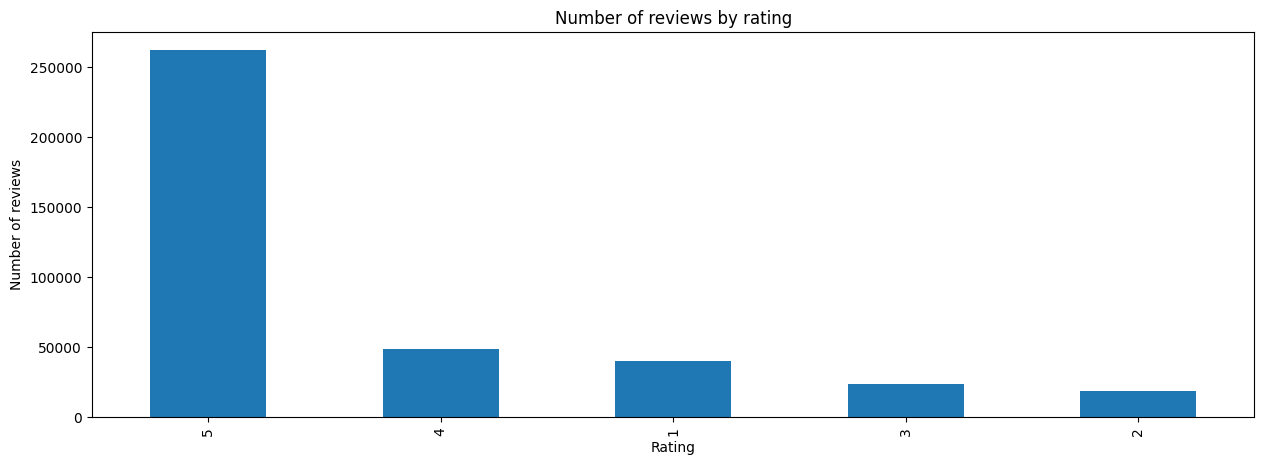

In [13]:
df_train.review_rating.value_counts().plot(kind='bar', figsize=(15,5))
plt.title("Number of reviews by rating")
plt.ylabel("Number of reviews")
plt.xlabel("Rating") # if you do not want Text(0.5,0,'Make'), use ; at the end of this line

In [14]:
df_price=pd.read_csv("price_data.csv")
df_rank=pd.read_csv("rank_data.csv")



In [15]:
print(len(df_price["product_ID"].unique()))
print(len(df_rank["product_ID"].unique()))

450
450


In [16]:
import seaborn as sns

In [17]:
df_price.shape

(77917, 3)

In [18]:
df_rank = df_rank.rename(columns={'date': 'review_date'})

In [19]:
df_train_rank=pd.merge(df_train,df_rank, on=['review_date', 'product_ID'], how='inner')

In [20]:
df_train_rank.shape

(275733, 12)

<AxesSubplot: xlabel='fake_review', ylabel='count'>

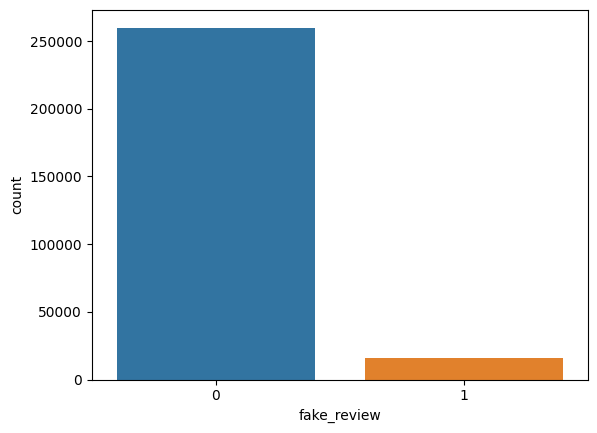

In [21]:
import seaborn as sns
sns.countplot(x=df_train_rank['fake_review'])

In [22]:
df_train_rank['fake_review'].value_counts()

0    259938
1     15795
Name: fake_review, dtype: int64

In [23]:
print(len(df_train_rank["product_ID"].unique()))

446


In [24]:
df_train_rank_fake= df_train_rank[df_train_rank['fake_review']==1]

In [25]:
df_train_rank_non_fake= df_train_rank[df_train_rank['fake_review']==0]

In [26]:
print(df_train_rank_fake.shape)
print(df_train_rank_non_fake.shape)

(15795, 12)
(259938, 12)


In [27]:
non_fake_downsampled= df_train_rank_non_fake.sample(df_train_rank_fake.shape[0], random_state=42)
non_fake_downsampled.shape

(15795, 12)

In [28]:
df_balanced=pd.concat([non_fake_downsampled, df_train_rank_fake])

<AxesSubplot: xlabel='fake_review', ylabel='count'>

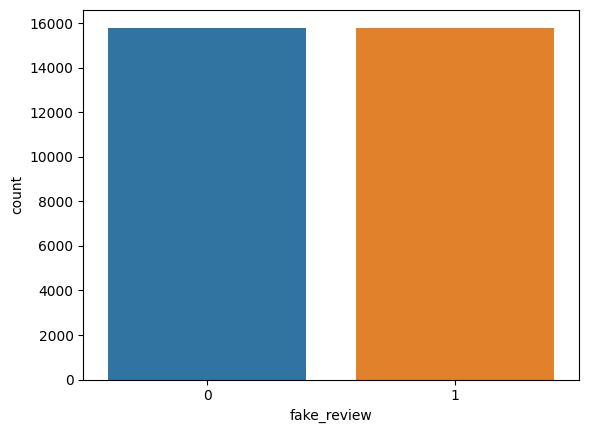

In [29]:
sns.countplot(x=df_balanced['fake_review'])

In [26]:
df_balanced.head()

,review_title,review_body,review_date,review_rating,number_of_photos,helpful_vote,reviewer_ID,fake_asin,fake_review,product_ID,review_ID,rank
230728,Exactly as described,Exactly as described. Good quality. Would reco...,2020-02-02,5,0,0,1015151,0,0,124,228678,4777
51794,You won’t regret your purchase,I was looking for a headset for my 11 year old...,2020-07-30,5,0,0,288532,1,0,408,230449,39
91987,Great organizer,Love this product! I bought it to organize my...,2018-09-02,5,0,0,289910,1,0,263,430116,1064
219246,Can’t give it less than 4 stars due to the fac...,Broke after almost 2 years but technically onl...,2018-04-30,4,0,0,544598,0,0,120,116150,2338
223585,Easy to mount,"Great sounding mic for vocals, you can’t go wr...",2020-09-06,5,2,0,511177,0,0,16,359008,827


In [30]:
import string
import nltk

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aravi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
def text_process(mess):
  #Takes in a string of text, then performs the following
   #1. Remove all the punctuation
   #2. Remove all stopwords
   #3. Returns a list of the cleaned text
  nopunc=[str(char) for char in str(mess) if char not in string.punctuation] #check the charcters to see if they are in punctuation
  nopunc=''.join(nopunc) #join the characters again to form the string
  return[''.join(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
# df_balanced['review_body']= df_balanced['review_body'].apply(lambda x: text_process(x))
df_balanced['review_body']= df_balanced['review_body'].apply(text_process)

In [34]:
df_balanced['review_body'].head()

98414     [Gave, gift, never, heard, anything, back, thi...
258017                   [Handy, cute, love, design, spout]
214183    [bought, one, great, happy, got, second, one, ...
178795                                      [Perfect, heat]
215713         [hard, read, distance, 5, feet, away, angle]
Name: review_body, dtype: object

In [35]:
def listToString(s):
  str1=" "
  return(str1.join(s))

In [36]:
df_balanced['review_body']= df_balanced['review_body'].apply(listToString)

In [37]:
df_balanced.head()

,review_title,review_body,review_date,review_rating,number_of_photos,helpful_vote,reviewer_ID,fake_asin,fake_review,product_ID,review_ID,rank
98414,Four Stars,Gave gift never heard anything back think great,2018-03-09,4,0,0,979093,0,0,291,101755,80
258017,Easy fill.....,Handy cute love design spout,2019-12-19,5,0,0,425076,0,0,87,54405,271
214183,Mostly happy,bought one great happy got second one missing ...,2020-02-05,3,0,0,1018676,0,0,238,229627,2244
178795,Keeps curls tight,Perfect heat,2019-03-14,5,0,0,402085,0,0,72,288760,20842
215713,Just a so so product.,hard read distance 5 feet away angle,2017-02-09,3,0,0,812792,0,0,145,13026,19050


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
#create a tf-idf vectorizer object
tfidf_vectorizer=TfidfVectorizer(max_features=1000)
X= tfidf_vectorizer.fit_transform(df_balanced['review_body'])

In [57]:
X.shape

(31590, 1000)

In [58]:
y=df_balanced['fake_review']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag= BaggingClassifier(n_estimators=10, random_state=42)
bag.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [62]:
pred=bag.predict(X_test)

In [63]:
from sklearn.metrics import classification_report

report=classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.64      0.61      4816
           1       0.58      0.52      0.55      4661

    accuracy                           0.58      9477
   macro avg       0.58      0.58      0.58      9477
weighted avg       0.58      0.58      0.58      9477



In [64]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
pred_dt=dt.predict(X_test)

In [66]:
from sklearn.metrics import classification_report

report=classification_report(y_test, pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      4816
           1       0.55      0.54      0.54      4661

    accuracy                           0.55      9477
   macro avg       0.55      0.55      0.55      9477
weighted avg       0.55      0.55      0.55      9477



In [67]:
df_test = pd.read_csv("test_reviews.csv")

In [68]:
df_test.head()

,review_title,review_body,review_date,review_rating,number_of_photos,helpful_vote,reviewer_ID,fake_asin,product_ID,review_ID
0,Fit of phone 7+,I have the iPhone 7+ and it says it fits this....,2019-09-04,4,1,0,440934,0,281,427196
1,Sturdy and simply,This product comes assembled and works simply ...,2020-08-22,5,0,0,1044859,0,17,205467
2,Great product,I really like this product because 1st my kids...,2020-05-29,5,0,0,377805,1,342,202189
3,Item got good reviews but ...,I couldn't get the product to stay in my ear. ...,2019-09-07,1,0,2,747580,0,212,56726
4,Great Sheet Protectors - Love the Easy Loading,These sheet protectors were the perfect weight...,2012-10-05,5,0,0,1170571,0,10,409558


In [76]:
df_test['review_body'].fillna("empty review", inplace = True)

In [77]:
df_test['review_body'].isnull().sum()

0

In [50]:
df_test['review_body']= df_test['review_body'].apply(text_process)

In [51]:
df_test['review_body']= df_test['review_body'].apply(listToString)

In [78]:
X_unseen= tfidf_vectorizer.fit_transform(df_test['review_body'])

In [79]:
X_unseen.shape

(43640, 1000)

In [80]:
pred_unseen=bag.predict(X_unseen)

In [83]:
pred_unseen[0:10]

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [85]:
df_test['fake_review']=pred_unseen

In [86]:
df_test.head()

,review_title,review_body,review_date,review_rating,number_of_photos,helpful_vote,reviewer_ID,fake_asin,product_ID,review_ID,fake_review
0,Fit of phone 7+,I have the iPhone 7+ and it says it fits this....,2019-09-04,4,1,0,440934,0,281,427196,0
1,Sturdy and simply,This product comes assembled and works simply ...,2020-08-22,5,0,0,1044859,0,17,205467,1
2,Great product,I really like this product because 1st my kids...,2020-05-29,5,0,0,377805,1,342,202189,1
3,Item got good reviews but ...,I couldn't get the product to stay in my ear. ...,2019-09-07,1,0,2,747580,0,212,56726,1
4,Great Sheet Protectors - Love the Easy Loading,These sheet protectors were the perfect weight...,2012-10-05,5,0,0,1170571,0,10,409558,1


In [90]:
df_results= df_test[['review_ID', 'fake_review']]

In [91]:
df_results.head()

,review_ID,fake_review
0,427196,0
1,205467,1
2,202189,1
3,56726,1
4,409558,1


In [92]:
df_results.shape

(43640, 2)

In [ ]:
df_results.to_csv('Predictions.csv')